# Quick dataset exploration and preprocessing
Source: https://sites.google.com/site/frankverbo/data-and-software/data-set-on-the-european-car-market?authuser=0

Preprocessing means a split of the dataset by years in order to later on simulate a continuous update of the model and data.

In [19]:
import pandas as pd
import os
from matplotlib import pyplot as plt

In [20]:
data_folder = '../data/raw/'
dataset_file = 'cars.xlsx'

In [21]:
df_original = pd.read_excel(os.path.join(data_folder, dataset_file))
df_original.dtypes

ye          int64
ma          int64
co          int64
zcode       int64
brd         int64
type       object
brand      object
model      object
org         int64
loc         int64
cla         int64
home        int64
frm         int64
qu          int64
cy        float64
hp        float64
we          int64
pl        float64
do        float64
le        float64
wi        float64
he        float64
li1       float64
li2       float64
li3       float64
li        float64
sp        float64
ac        float64
pr        float64
princ     float64
eurpr     float64
exppr     float64
avexr     float64
avdexr    float64
avcpr     float64
avppr     float64
avdcpr    float64
avdppr    float64
xexr      float64
tax       float64
pop         int64
ngdp        int64
rgdp      float64
engdp       int64
ergdp     float64
engdpc    float64
ergdpc    float64
dtype: object

In [22]:
df = df_original[['ye', 'brand', 'model', 'hp', 'li', 'pl', 'do', 'le', 'wi', 'he', 'sp', 'ac', 'eurpr']]
df = df.rename(columns={"ye": "year", "hp": "horsepower", "li":"consumption", "pl":"places", "do":"doors", "le":"length", "wi":"width",
                  "he":"height", "sp":"speed","ac":"acceleration", "eurpr":"price_eur"})
df['year'] = df['year'] + 1900

In [23]:
df.describe()

,year,horsepower,consumption,places,doors,length,width,height,speed,acceleration,price_eur
count,11549.000000,11549.000000,11549.000000,11549.000000,11547.000000,11549.000000,11549.000000,11549.000000,11545.000000,9232.000000,11549.000000
mean,1985.430946,57.141763,8.179929,4.869521,3.653061,415.827344,164.379971,140.432462,159.915418,15.241356,8352.518814
std,8.534300,23.884423,1.715343,0.379587,0.896480,44.386449,9.618415,4.623248,23.802716,5.232542,5540.922831
min,1970.000000,13.000000,4.000000,2.000000,2.000000,250.000000,122.000000,117.500000,95.000000,7.500000,830.667603
25%,1978.000000,40.000000,6.933333,5.000000,3.000000,384.000000,159.000000,138.000000,145.000000,12.000000,4370.087402
50%,1986.000000,54.500000,8.000000,5.000000,4.000000,421.500000,165.500000,140.000000,160.000000,14.100000,6944.484863
75%,1993.000000,73.000000,9.166667,5.000000,4.000000,451.000000,170.500000,142.500000,175.000000,17.000000,10779.138672
max,1999.000000,169.500000,18.600000,7.000000,5.000000,506.000000,188.000000,173.500000,247.000000,50.000000,49580.648438


In [24]:
df.head()

,year,brand,model,horsepower,consumption,places,doors,length,width,height,speed,acceleration,price_eur
0,1983,alfa romeo,33,58.0,7.766667,5.0,5.0,401.5,161.0,130.5,165.0,NaN,6078.426758
1,1984,alfa romeo,33,58.0,7.766667,5.0,5.0,401.5,161.0,130.5,165.0,11.5,5859.434082
2,1985,alfa romeo,33,58.0,7.766667,5.0,5.0,401.5,161.0,130.5,165.0,11.5,6126.146973
3,1986,alfa romeo,33,58.0,7.766667,5.0,5.0,401.5,161.0,134.5,167.0,11.5,6559.178223
4,1987,alfa romeo,33,58.0,7.933333,5.0,5.0,401.5,161.0,134.5,167.0,11.5,7272.066406


In [25]:
df.dtypes

year              int64
brand            object
model            object
horsepower      float64
consumption     float64
places          float64
doors           float64
length          float64
width           float64
height          float64
speed           float64
acceleration    float64
price_eur       float64
dtype: object

In [26]:
df['brand'].value_counts()

renault        890
fiat           886
citroen        734
rover          718
opel           713
peugeot        668
ford           631
VW             604
nissan         480
lancia         461
toyota         459
alfa romeo     443
audi           398
mazda          374
volvo          358
BMW            349
honda          315
mitsubishi     300
mercedes       254
seat           247
talbot         219
saab           196
hyundai        161
suzuki         125
daihatsu       116
tal/simca       85
daewoo          66
innocenti       57
kia             54
skoda           48
subaru          29
tal/matra       29
yugo            28
daf             28
tal/hillman     17
tal/sunb         4
MCC              4
simca            1
Name: brand, dtype: int64

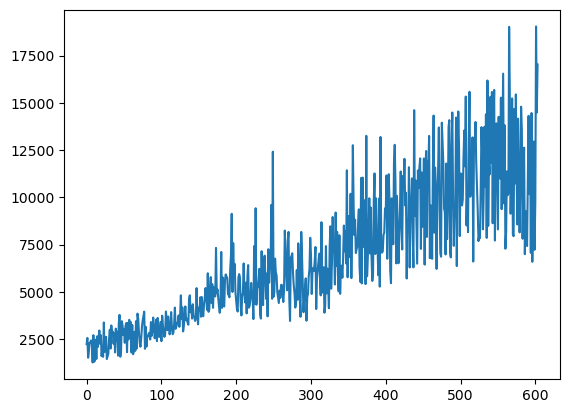

In [27]:
df = df.sort_values(by=['year'])
plt.plot(df[df['brand']=='VW']['price_eur'].values)
plt.show()

/var/folders/g6/svjv8tvx4xjbr97g7l2krybh0000gn/T/ipykernel_81750/3308615164.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df.groupby(['year']).mean()['price_eur'])


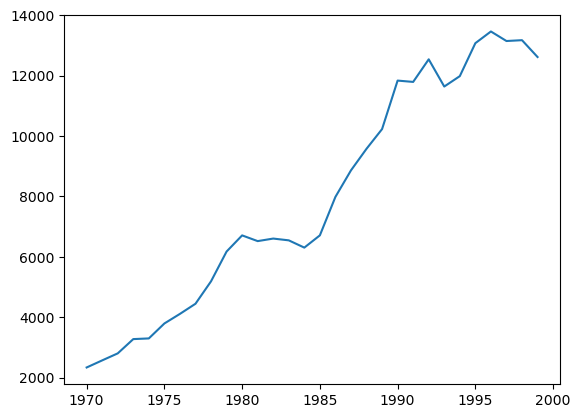

In [28]:
plt.plot(df.groupby(['year']).mean()['price_eur'])
plt.show()

(2068, 6)
(2068,)
0.818407963487693
[2457.15275824 2723.18982442 3143.87726349 ... 4335.28875299 4245.02154461
 5785.76905624]


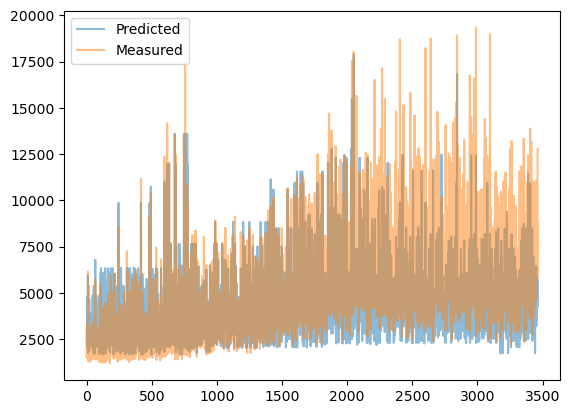

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
feature_cols = ['horsepower','places', 'doors','speed', 'consumption', 'acceleration']
#feature_cols = ['horsepower']

target_col = 'price_eur'
df=df.dropna().reset_index(drop=True)
X = df[df['year']<80][feature_cols].values
print(np.shape(X))
y = df[df['year']<80][target_col].values
print(np.shape(y))
#reg = LinearRegression().fit(X, y)
reg = GradientBoostingRegressor().fit(X, y)

print(reg.score(X, y))
#print(reg.coef_)
#print(reg.intercept_)
print(reg.predict(df[df['year']<85][feature_cols].values))
plt.plot(reg.predict(df[df['year']<85][feature_cols].values),label='Predicted', alpha=0.5)
plt.plot(df[df['year']<85][target_col].values,label='Measured', alpha=0.5)
plt.legend()
plt.show()

In [12]:
#!pip install lazypredict 
#!pip install wheel
#!conda install -c conda-forge lightgbm -y

In [13]:
'''
from lazypredict.Supervised import LazyRegressor

X_train = df_brussels[df_brussels['Year']<2020][['Day','Month']].values
X_test = df_brussels[df_brussels['Year']==2019][['Day','Month']].values
y_train = df_brussels[df_brussels['Year']<2020]['AvgTemperatureC'].values
y_test = df_brussels[df_brussels['Year']==2019]['AvgTemperatureC'].values
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)
'''

"\nfrom lazypredict.Supervised import LazyRegressor\n\nX_train = df_brussels[df_brussels['Year']<2020][['Day','Month']].values\nX_test = df_brussels[df_brussels['Year']==2019][['Day','Month']].values\ny_train = df_brussels[df_brussels['Year']<2020]['AvgTemperatureC'].values\ny_test = df_brussels[df_brussels['Year']==2019]['AvgTemperatureC'].values\nreg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)\nmodels, predictions = reg.fit(X_train, X_test, y_train, y_test)\nprint(models)\n"

In [14]:
temps = df_brussels[(df_brussels['Year']==1995) & (df_brussels['Month']<6)]['AvgTemperatureC'].values.copy()
timeseries_length = 10
X = np.lib.stride_tricks.as_strided(temps, (len(temps)-timeseries_length,timeseries_length), temps.strides*2 )
X_train = np.array(X)[:,:-1]
y_train = np.array(X)[:,-1]

reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.coef_)
print(reg.intercept_)

temps = df_brussels[df_brussels['Year']==2019]['AvgTemperatureC'].values.copy()
X = np.lib.stride_tricks.as_strided(temps, (len(temps)-timeseries_length,timeseries_length), temps.strides*2 )
X_test = np.array(X)[:,:-1]
y_test = np.array(X)[:,-1]

plt.plot(reg.predict(X_test),label='Predicted')
plt.plot(y_test,label='Measured')
plt.legend()
plt.show()

NameError: name 'df_brussels' is not defined

# Create yearly dataset

In [30]:
for year in df['year'].value_counts().index:
    print(year)
    df[df['year'] == year].to_csv(os.path.join('../data/yearly', f'{year}.csv'), index=False)

1999
1998
1996
1997
1995
1983
1993
1994
1991
1984
1985
1992
1988
1990
1986
1989
1987
1981
1982
1980
1978
1979
1977
1972
1976
1974
1975
1973
1971
1970
